In [1]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.figure_factory as ff
from scipy.stats import shapiro

In [2]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOIM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness'},errors="raise")


Grocery_Budget_Strictness
1     62
2    343
3    288
4    364
5     73
6    470
Name: dummy, dtype: int64
Statistics=0.892, p=0.327


Text(0.5, 1.0, 'Population distrubtion of Grocery Budget Strictness')

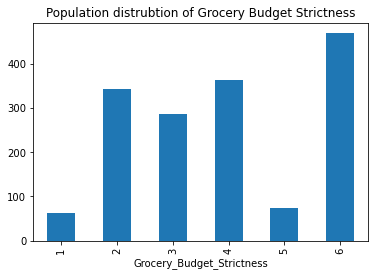

In [3]:
#--------------------------------------------------------------------------------#
#Before Running Anova, Test for normality                                                           #  
#--------------------------------------------------------------------------------#
data = survey_raw.groupby("Grocery_Budget_Strictness").count()
data = data["dummy"]
print(data)
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
data.plot(kind = "bar")
plt.title("Population distrubtion of Grocery Budget Strictness")

# data = survey_raw.groupby("LOIF").count()
# data = data["dummy"]
# stat, p = shapiro(data)
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# data.plot(kind = "bar")
# plt.title("Population distrubtion of Grocery Budget Strictness")

# data = survey_raw.groupby(["LOIF","Grocery_Budget_Strictness"]).count()
# data = data["dummy"]
# stat, p = shapiro(data)
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# data.plot(kind = "bar")
# plt.title("Population distrubtion of Grocery Budget Strictness")

F_onewayResult(statistic=5.593444518114278, pvalue=0.008085039907323954)
P Value: 0.008085039907323954


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2285,0.7452,-0.7216,0.2646,False
1,3,-0.3602,0.3121,-0.8605,0.1401,False
1,4,-0.3694,0.2638,-0.8603,0.1216,False
1,5,-0.6045,0.0589,-1.2216,0.0126,False
1,6,-0.6467,0.0019,-1.1295,-0.1639,True
2,3,-0.1317,0.7491,-0.4173,0.1539,False
2,4,-0.1408,0.6459,-0.4097,0.1281,False
2,5,-0.376,0.1828,-0.8365,0.0846,False
2,6,-0.4182,0.001,-0.672,-0.1645,True
3,4,-0.0092,0.9,-0.291,0.2726,False


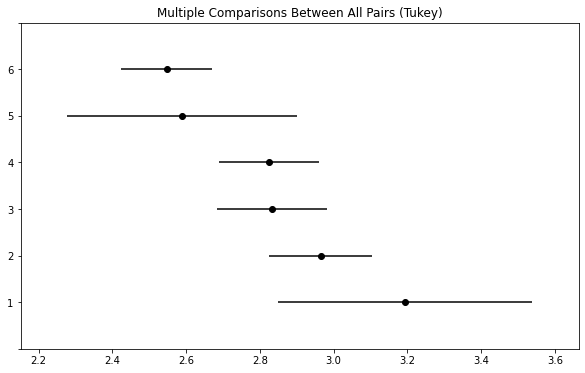

In [4]:
#------------------------------------------------------------------------#
#Anova on Grocery_Budget_Strictness frequenct                            #  
#------------------------------------------------------------------------#
Grocery_Budget_Strictness_LOTM = survey_raw.pivot_table("dummy",index = "LOIF",columns = "Grocery_Budget_Strictness" ,aggfunc = sum)

#Get total for each strictness level
Grocery_Budget_Strictness_total = survey_raw.groupby("Grocery_Budget_Strictness").sum()
group_by_GBS = survey_raw.groupby("Grocery_Budget_Strictness")
total = Grocery_Budget_Strictness_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]

lotflabel = []
gbslabel = []

for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Grocery_Budget_Strictness_LOTM[i])
sta, p = st.f_oneway(*allTypes)
print(st.f_oneway(*allTypes))
print("P Value:",p)

for i in range(1,7):
    for each in group_by_GBS.get_group(i)["LOIF"]:
        lotflabel.append(each)
        gbslabel.append(i)

#Post-HOC
tukey = pairwise_tukeyhsd(endog = lotflabel,
                        groups = gbslabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
plt

tukey.summary()


#------Graph------#
# Grocery_Budget_Strictness_LOTM_freq = Grocery_Budget_Strictness_LOTM/total
# labels = ["1","2","3","4","5","6"]
# fig, ax = plt.subplots(figsize = (10,12))
# ax.bar(labels,Grocery_Budget_Strictness_LOTM_freq.loc[1],width = 0.65,label = "1")
# pre = 0
# for i in range(2,6): 
#     pre = pre+Grocery_Budget_Strictness_LOTM_freq.loc[i-1]
#     ax.bar(labels,Grocery_Budget_Strictness_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
# ax.set_ylabel("LOIM Percentage")
# ax.set_title("Distribution of LOIM in different Grocery_Budget_Strictness")
# ax.legend()
# plt.show()